# **Homework 2 - Simplified Object Detection**

<div style="border: 3px solid #222; padding: 16px; border-radius: 10px; background-color: #1c1f26; font-family: 'Helvetica Neue', Helvetica, Arial, sans-serif; color: #e0e0e0;">
  <div style="display: flex; align-items: center; gap: 8px; margin-top: 12px;">
    <span style="font-size: 24px; color: #ff5555;">&#128274;</span>
    <span style="font-size: 16px;"><strong>Project:</strong> Homeworks</span>
  </div>
  <div style="display: flex; align-items: center; gap: 8px; margin-top: 8px;">
    <span style="font-size: 20px; color: #ff5555;">&#128218;</span>
    <span style="font-size: 16px;"><strong>Course:</strong> Deep Network Development</span>
  </div>
  <div style="margin-top: 12px; font-size: 14px;">
    <span style="font-size: 18px; color: #6e8192;">&#128100;</span>
    <span style="font-weight: bold;"><strong>Authors:</strong></span> Tamás Takács, Imre Molnár (PhD students, Department of Artificial Intelligence, Eötvös Loránd University)
  </div>
</div>
<hr style="border: none; border-top: 2px solid #444;">
<br>

<img src="https://miro.medium.com/v2/resize:fit:1400/1*hrXwIJgw51P6p1xJh_IK-g.png" alt="1" border="0">


This notebook contains the required task for the **second homework** of the **Deep Network Development (DNDEG)** course. Read the task description carefully and **fill in the empty code cells**.


# **Task Description**

You are required to **create and train a custom object detection model** to solve a simplified object detection task. Additionally, you will implement the same task using a **pre-trained YOLO model**.  

To achieve this, you will first **generate a synthetic dataset** by placing a specific object onto a set of background images. This dataset will be used for training both models. Since this is a **simplified object detection problem**, each image should contain **only a single object**, ensuring a controlled training environment.  

Your goal is to **train a custom object detection model from scratch** and later **fine-tune a pre-trained YOLO model** using the same dataset.

## **Expectations**

- While **high performance is not expected**, your model should **perform better than random guessing**, and the **loss should consistently decrease across epochs**.  

- You should structure your dataset using the **YOLO format for bounding box regression** (`<class_id> <x_center> <y_center> <width> <height>`), where:

  - `<class_id>` is the object class label (an integer starting from 0).
  - `<x_center>` and `<y_center>` are the normalized coordinates (values between 0 and 1) of the bounding box center.
  - `<width>` and `<height>` are the normalized dimensions (values between 0 and 1) of the bounding box relative to the image size.

ensuring that the same dataset can be seamlessly used for fine-tuning a **pre-trained YOLO model**.

- Your evaluation should include key metrics such as **precision, recall, F1-score, mAP (mean average precision), and IoU (Intersection over Union)**, along with monitoring the overall loss trends throughout training. These metrics should be **visualized using plots and graphs** (e.g., with **matplotlib** or **seaborn**) to illustrate performance over time.  

- To prevent overfitting, you should implement techniques such as **Early Stopping** and ensure that the **best-performing model is saved** during training.  

- For better experiment tracking and visualization, consider using **WandB (Weights and Biases)** or **TensorBoard** to log training progress, performance metrics, and model improvements in real time.  
  
## **Requirements**

You will be required to choose at least three different objects that you would like to run object detection on. For the background images, you are free to use anything thematic and download images utilizing a web crawler. A simple example could be `Waldo`, `Wilma`, and `Wenda`, with the background images being *Where's Waldo?* doodles.

- Data Visualization:
  - Display **your chosen objects with the background removed**.
  - Display **a few of your background images**.
  - Visualize the **synthetic dataset**, where each image should contain a background with an object placed onto it, along with a bounding box and class label.

- Performance Monitoring:
  - **Visualize training and validation losses** (classification loss, regression loss) after training the network.
  - Use **plots and metrics** (e.g., matplotlib, seaborn) to display performance trends.

- Implement overfitting prevention techniques, such as:
  - **Early stopping**
  - **Regularization techniques** (e.g., dropout, weight decay)
  - **Experimenting with different loss functions**
  - Save the **best-performing model** during training.

- Evaluate model performance:
  - **Visualize predictions** on a batch of test images.
  - Calculate **precision, recall, F1-score, mAP, and IoU** for the test dataset.

- Fine-Tuning YOLO:
  - Fine-tune a **YOLO nano** model (**version 5 or later**) on your object detection task.
  - Evaluate model performance using the **same metrics** as before.

- Optionally, use WandB (Weights and Biases) or TensorBoard to:
  - Track and visualize **training progress**.
  - Monitor **model performance** over time.
  - Log **key metrics**.


> **NOTE:** A **multi-shot object detector is unnecessary** since you are dealing with **single-object detection**, for which a simple bounding box regression and classification head will suffice. Implementing `Non-Maximum Suppression` is also **not required** due to the single-object constraint. If you're feeling adventurous, you could extend this homework to multi-object detection using a single-shot approach for a **+1 improvement to your grade**!

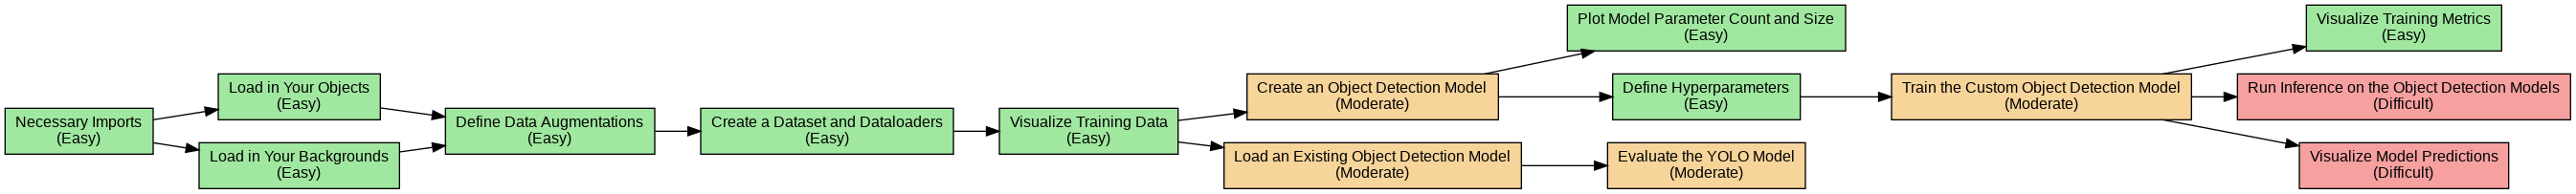

In [1]:
# @title Custom Object Detection Tasks
# %%capture flowchart_output
# HIDDEN CELL
from graphviz import Digraph
from IPython.display import Image as IMG

def create_flowchart(output_filename='flowchart'):
    dot = Digraph(name='Simplified Object Detection', format='png')
    dot.attr(rankdir='LR')
    dot.attr('node', shape='box', style='filled', fontsize='12', fontname='Arial')

    dot.node('Imports', 'Necessary Imports\n(Easy)', fillcolor='#A0E7A0')

    dot.node('LoadObjects', 'Load in Your Objects\n(Easy)', fillcolor='#A0E7A0')
    dot.node('LoadBackgrounds', 'Load in Your Backgrounds\n(Easy)', fillcolor='#A0E7A0')

    dot.node('AugmentData', 'Define Data Augmentations\n(Easy)', fillcolor='#A0E7A0')
    dot.node('DatasetDataloader', 'Create a Dataset and Dataloaders\n(Easy)', fillcolor='#A0E7A0')

    dot.node('VisualizeSample', 'Visualize Training Data\n(Easy)', fillcolor='#A0E7A0')

    dot.node('CreateModel', 'Create an Object Detection Model\n(Moderate)', fillcolor='#F6D49A')

    dot.node('TorchSummary', 'Plot Model Parameter Count and Size\n(Easy)', fillcolor='#A0E7A0')
    dot.node('Hyperparameters', 'Define Hyperparameters\n(Easy)', fillcolor='#A0E7A0')

    dot.node('TrainModel', 'Train the Custom Object Detection Model\n(Moderate)', fillcolor='#F6D49A')

    dot.node('VisualizeTrain', 'Visualize Training Metrics\n(Easy)', fillcolor='#A0E7A0')
    dot.node('RunInference', 'Run Inference on the Object Detection Models\n(Difficult)', fillcolor='#F6A0A0')
    dot.node('VisPred', 'Visualize Model Predictions\n(Difficult)', fillcolor='#F6A0A0')


    dot.node('LoadYOLO', 'Load an Existing Object Detection Model\n(Moderate)', fillcolor='#F6D49A')

    dot.node('EvalYOLO', 'Evaluate the YOLO Model\n(Moderate)', fillcolor='#F6D49A')

    # Edges
    dot.edge('Imports', 'LoadObjects')
    dot.edge('Imports', 'LoadBackgrounds')

    dot.edge('LoadObjects', 'AugmentData')
    dot.edge('LoadBackgrounds', 'AugmentData')

    dot.edge('AugmentData', 'DatasetDataloader')

    dot.edge('DatasetDataloader', 'VisualizeSample')

    dot.edge('VisualizeSample', 'CreateModel')

    dot.edge('CreateModel', 'TorchSummary')
    dot.edge('CreateModel', 'Hyperparameters')

    dot.edge('Hyperparameters', 'TrainModel')

    dot.edge('TrainModel', 'VisualizeTrain')
    dot.edge('TrainModel', 'RunInference')
    dot.edge('TrainModel', 'VisPred')

    dot.edge('VisualizeSample', 'LoadYOLO')
    dot.edge('LoadYOLO', 'EvalYOLO')

    dot.render(output_filename, view=False)

create_flowchart('homework2_flowchart')
IMG('homework2_flowchart.png')

Each section of the Notebook will guide you through the task:
- `necessary imports`
- `loading in chosen objects`
- `crawling the web for background images`
- `creating a synthetic dataset`
- `creating dataloaders`
- `visualizing the training data`
- `creating a custom model for object detection`
- `defining a loss function and an optimizer`
- `training and validating the custom model`
- `testing the custom model`
- `fine-tuning a YOLO model`
- `evaluating YOLO results`

The sections are there to guide you but you **do not have to follow them strictly**.

Copy this notebook to your drive (`File -> Save a copy in Drive`), edit it, and upload the final `.ipynb` file to [Canvas](https://canvas.elte.hu). If you are using this in **Google Colab**, save it as `.ipynb` and upload it, or share the public link. If you have your own machine with Jupyter installed, you can work there as well, as long as you save and upload the `.ipynb` file.

## **General Rules**
Please check all the requirements listed on **Canvas**, but here are some general rules:

- **No NSFW, inappropriate, offensive, or negative images**. Be creative or use your hobbies as inspiration.
- The model is **not expected to achieve high performance** but must perform better than random guessing.
- Copying others' code will make you fail the assignment automatically, resulting in a **0**.
- Not submitting anything results in a **0**.
- Submitting something, as long as it is not an empty notebook, might result in a 1.
- **Deadline is November 4th Tuesday 11:59 PM** (strict, no late submission)
- Feel free to add more code cells as needed. But don't put code into external Python files.
- Please add your `name` and `Neptun ID` below.

`Good luck!`

## **Guidelines**
Please carefully read each cell of the notebook, as they contain guidelines to help you complete the assignments. While you don't have to follow them strictly, we believe that they provide enough help.

**Name:**

**Neptun ID:**

## **0. Necessary Imports**
Import all the necessary packages for this assignment. **ONLY PYTORCH MODELS ARE ACCEPTED!**

In [2]:
import torch
import os
import numpy as np
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torch import nn
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

device = torch.device("cuda:0") if torch.cuda.is_available() else torch.device("cpu")

## **1.1 Object Loading Process**

For this assignment you might choose 3 of the [Where's Wally Characters](https://waldo.fandom.com/wiki/Category:Characters).


<img src='https://kotaksuratriza.wordpress.com/wp-content/uploads/2012/06/wally-and-friends.jpg' />

**Please select 3 or more objects.** After selecting the objects, **remove the background, keeping only the object itself**. You can do this manually, online, or by using code (this step is not part of the assignment evaluation).

As an example, the following objects were chosen (with the background removed using the Segment Anything Model). **Make sure to visualize all of your objects** with `Matplotlib` or `Seaborn`!

config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/2.56G [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/466 [00:00<?, ?B/s]

/tmp/ipython-input-1912361949.py:39: DeprecationWarning: 'mode' parameter is deprecated and will be removed in Pillow 13 (2026-10-15)
  result = Image.fromarray(rgba,"RGBA")


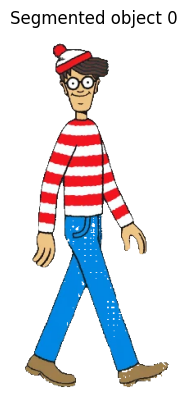

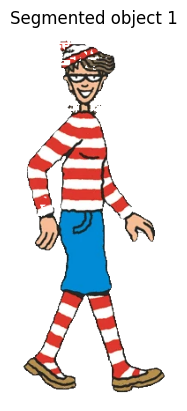

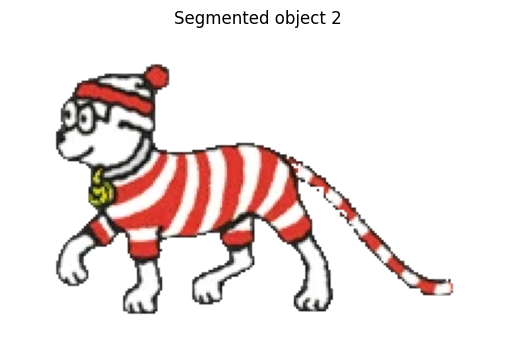

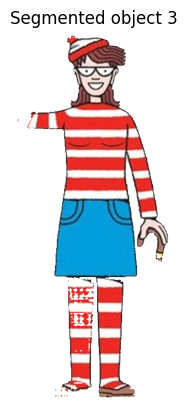

In [3]:

from PIL import Image
import requests
from transformers import SamModel, SamProcessor, infer_device
SENSITIVITY_THRESHOLD = -0.99
device = infer_device()
model = SamModel.from_pretrained("facebook/sam-vit-huge").to(device)
processor = SamProcessor.from_pretrained("facebook/sam-vit-huge")

OUTPUT_DIR = "./objects"
if not os.path.exists(OUTPUT_DIR):
    os.makedirs(OUTPUT_DIR)
images=["https://static.wikia.nocookie.net/waldo/images/9/9d/Character.Waldo.jpg/revision/latest?cb=20071001045624",
        "https://static.wikia.nocookie.net/waldo/images/3/3e/Character.Wenda.jpg/revision/latest?cb=20071001044014",
        "https://static.wikia.nocookie.net/waldo/images/b/bc/Character.Woof.jpg/revision/latest?cb=20071001045027",
        "https://static.wikia.nocookie.net/waldo/images/3/33/WilmaUmbrella.jpg/revision/latest?cb=20150403085702"]

for inx, image_url in enumerate(images):
  raw_image = Image.open(requests.get(image_url, stream=True).raw).convert("RGB")
  width, height = raw_image.size
  x_min = int(width*0.1)
  y_min = int(height*0.05)
  x_max = int(width*0.9)
  y_max = int(height*0.95)
  box_coordinates = [x_min, y_min, x_max, y_max]
  input_boxes = torch.tensor([box_coordinates], device=device, dtype=torch.float32).unsqueeze(0)

  inputs = processor(raw_image, input_boxes=input_boxes, return_tensors="pt").to(device)
  with torch.no_grad():
      outputs = model(**inputs)

  masks = processor.image_processor.post_process_masks(outputs.pred_masks.cpu(), inputs["original_sizes"].cpu(), inputs["reshaped_input_sizes"].cpu(), mask_threshold=SENSITIVITY_THRESHOLD)

  mask = masks[0][0][0].numpy()
  mask_image = Image.fromarray((mask * 255).astype(np.uint8)).resize(raw_image.size)
  raw_np = np.array(raw_image)
  mask_np = np.array(mask_image)
  rgba = np.dstack([raw_np, mask_np])

  result = Image.fromarray(rgba,"RGBA")
  result.save(f"./objects/object{inx}.png")

  plt.figure()
  plt.imshow(result)
  plt.axis("off")
  plt.title(f"Segmented object {inx}")
  plt.show()

## **1.2 Crawling the Web for Background Images**

To train a custom object detection model, a dataset is required. For this assignment, you will create a **synthetic dataset** by:  

- **Placing a single object at a random position** on a background image.  

The goal is to follow a similar approach to **Where’s Waldo doodles** by embedding objects into cluttered backgrounds. **Therefore, gather a selection of background images from various doodles.** This can be done manually or programmatically.  

To automate image collection, it is recommended to use `icrawler`. [Documentation](https://icrawler.readthedocs.io/en/latest/)

In [4]:
!pip install icrawler

In [5]:
!mkdir background

In case of any **errors, try using a different crawler**. You can use one of the following options:

```python
from icrawler.builtin import BaiduImageCrawler, BingImageCrawler, GoogleImageCrawler


In [6]:
from icrawler.builtin import GoogleImageCrawler

google_crawler = GoogleImageCrawler(
    parser_threads=2,
    downloader_threads=4,
    storage={'root_dir': 'background'}
)

for keyword in ['doodle background', 'cluttered doodle background', 'colorful doodle background', 'waldo doodle background', 'images without waldo', 'city birds eye view', 'birds eye view landscape', 'park birds eye view']:
    google_crawler.crawl(
        keyword=keyword, max_num=100, file_idx_offset='auto')

# Some images may return an error, but icrawler tries to find other images regardless

ERROR:downloader:Response status code 400, file https://media.istockphoto.com/id/1379780650/vector/fun-black-line-doodle-seamless-pattern.jpg
ERROR:downloader:Response status code 400, file https://media.istockphoto.com/id/1281119244/vector/seamless-pattern-doodle-for-teenagers-vector-illustration-in-hand-drawn-stile-for-web-fabric.jpg
ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/thumbnails/021/736/703/small/doodle-lines-arrows-circles-and-curves-hand-drawn-design-elements-isolated-on-white-background-for-infographic-illustration-vector.jpg
ERROR:downloader:Response status code 400, file https://media.istockphoto.com/id/1133192531/vector/seamless-pattern.jpg
ERROR:downloader:Response status code 404, file https://t4.ftcdn.net/jpg
ERROR:downloader:Response status code 404, file https://t3.ftcdn.net/jpg
ERROR:downloader:Response status code 403, file https://static.vecteezy.com/system/resources/thumbnails/002/289/261/small/school-education-

Make sure to **visualize a small subset of the background images as well**!
```python
def display_sample_images(directory):
  raise NotImplementedError
```

5 368


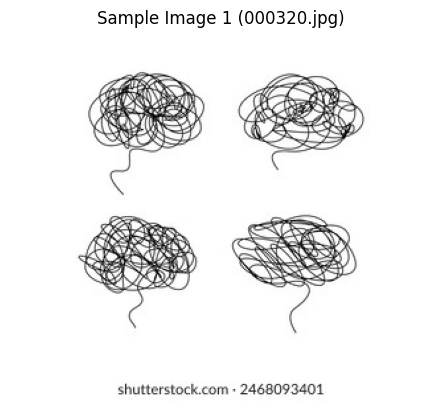

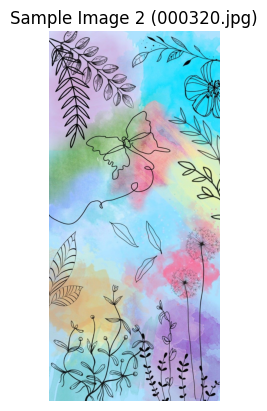

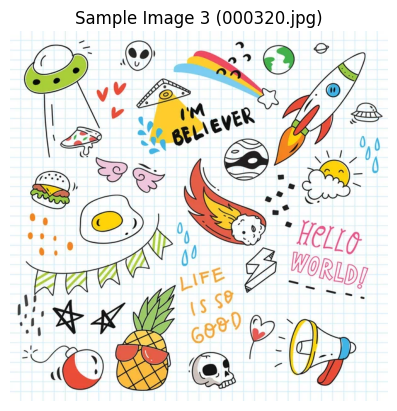

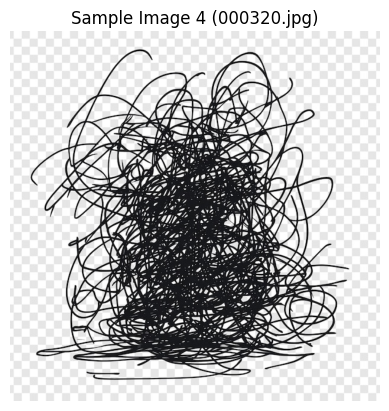

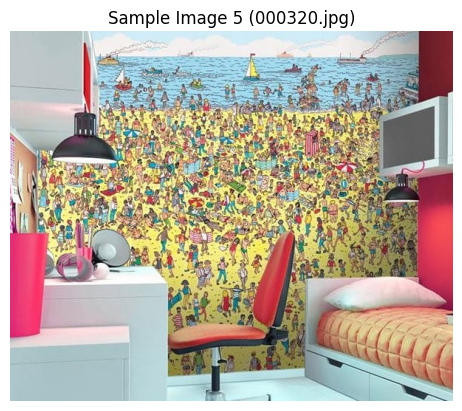

[<PIL.Image.Image image mode=RGBA size=319x280>,
 <PIL.Image.Image image mode=RGBA size=720x1560>,
 <PIL.Image.Image image mode=RGBA size=600x588>,
 <PIL.Image.Image image mode=RGBA size=626x626>,
 <PIL.Image.Image image mode=RGBA size=600x501>]

In [7]:

import random

def display_sample_images(directory, imgcount=5, display=True):
    images = []
    all_filepaths = []
    for i, filename in enumerate(os.listdir(directory)):
        filepath = os.path.join(directory, filename)
        if os.path.isfile(filepath) and filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
            all_filepaths.append(filepath)

    print(imgcount, len(all_filepaths))
    if imgcount > 0 and imgcount < len(all_filepaths):
      selected_filepaths = random.sample(all_filepaths, imgcount)
    else:
      selected_filepaths = all_filepaths

    for i, filepath in enumerate(selected_filepaths):
        img_pil = Image.open(filepath).convert("RGBA")
        images.append(img_pil)

        if display:
          img_np = np.array(img_pil)
          plt.figure()
          plt.imshow(img_np)
          plt.axis("off")
          plt.title(f"Sample Image {i+1} ({filename})")
          plt.show()

    return images
display_sample_images('./background', display=True)

## **2. Creating a Synthetic Dataset**

This is a crucial part of the assignment evaluation. Using the selected objects and collected background images, follow these steps to generate your dataset:  

1. **Randomly select background images** from your dataset.  
2. **Place a single object** from your selected set into each background image at a **random location**.  
3. **Record the object's coordinates** and create a corresponding bounding box. The format should be:  
   - If an object with height $h$ and width $w$ is positioned at $(x, y)$, the bounding box should follow:  
     $$ [x_{\text{center}}, y_{\text{center}}, \text{width}, \text{height}] $$  
   - Normalize the values using:  
     $$ \left[\frac{x + w/2}{\text{image width}}, \frac{y + h/2}{\text{image height}}, \frac{w}{\text{image width}}, \frac{h}{\text{image height}}\right] $$  
     where *image* refers to the background image dimensions.  
4. **Save the generated dataset**, as it will be used for training both your custom model and fine-tuning an existing object detection model.  
5. **Wrap the dataset creation** within a PyTorch `Dataset` class for seamless data handling and model training.  
6. **Split the dataset** into training, validation, and test sets to ensure proper model evaluation.
7. **Apply various transformations** on the training and validation datasets. Only apply **tensor conversion and normalization** on the test set.

<img src="https://i.ibb.co/XrHqLmz4/2.png" alt="2" border="0">

```python
def createDataset(root_dir, dataset_name, split, img_size, num_images):
    #This my own function... It creates and saves a dataset in the following format:
    # root/
    #     dataset/
    #             train/
    #                   images/
    #                         00001.jpg
    #                   labels/
    #                         00001.txt with the content [class yolo_x, yolo_y, yolo_w, yolo_h] following the yolo format
    #             val
    #...
    # ADD YOUR CODE HERE
    raise NotImplementedError

createDataset('dataset', 'background', split='train', img_size=(640,640), num_images=5000)
createDataset('dataset', 'background', split='val', img_size=(640,640), num_images=1000)
createDataset('dataset', 'background', split='test', img_size=(640,640), num_images=200)
```

```python
class ObjectDetectionDataset(Dataset):
    def __init__(self, root_dir, split, num_classes, transform):
        raise NotImplementedError
    def __len__(self):
        raise NotImplementedError
    def __getitem__(self, idx):
        raise NotImplementedError
```

In [8]:
import math
import random
CLASS_NAMES = ['waldo', 'wilma', 'wenda', 'dog']
NUM_CLASSES = len(CLASS_NAMES)
OBJECTS_ROOT_DIR = './objects'
OBJECT_MAPPING = {
    'object0': 0,
    'object1': 1,
    'object2': 2,
    'object3': 3
}
USED_BG_PATHS = set()
def load_all_objects(root_dir, object_map):
    all_objects_with_id = []
    for filename in os.listdir(root_dir):
        prefix = os.path.splitext(filename)[0]
        if prefix in object_map:
            filepath = os.path.join(root_dir, filename)
            try:
                class_id = object_map[prefix]
                image_obj = Image.open(filepath).convert("RGBA")
                all_objects_with_id.append((image_obj, class_id))
            except OSError:
                continue

    return all_objects_with_id
def createDataset(root_dir, dataset_name, split, img_size, num_images):
    global USED_BG_PATHS
    img_dir = os.path.join(root_dir, dataset_name, split, 'images')
    label_dir = os.path.join(root_dir, dataset_name, split, 'labels')
    os.makedirs(img_dir, exist_ok=True)
    os.makedirs(label_dir, exist_ok=True)
    BACKGROUND_DIR = './' + dataset_name
    all_objects_with_id = load_all_objects(OBJECTS_ROOT_DIR, OBJECT_MAPPING)

    if not all_objects_with_id:
        print("Error: No objects loaded from './objects'. Check files and OBJECT_MAPPING.")
        return

    all_bg_paths = []
    for filename in os.listdir(BACKGROUND_DIR):
        filepath = os.path.join(BACKGROUND_DIR, filename)
        if os.path.isfile(filepath) and filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
            if filepath not in USED_BG_PATHS:
                all_bg_paths.append(filepath)

    actual_num_to_sample = min(num_images, len(all_bg_paths))

    if actual_num_to_sample == 0:
        print(f"Warning: No unused background images available for {split}.")
        return

    selected_paths = random.sample(all_bg_paths, actual_num_to_sample)
    USED_BG_PATHS.update(selected_paths)
    W, H = img_size

    for i, image_path in enumerate(selected_paths):
        try:
            image = Image.open(image_path).convert("RGB").resize((W, H))
        except OSError:
             continue

        random_object_tuple = random.choice(all_objects_with_id)
        random_object, class_id = random_object_tuple

        obj_w, obj_h = random_object.width, random_object.height
        max_x = W - obj_w
        max_y = H - obj_h

        if max_x < 0 or max_y < 0:
            continue

        x_min_px = random.randint(0, max_x)
        y_min_px = random.randint(0, max_y)
        x_center_px = x_min_px + (obj_w / 2)
        y_center_px = y_min_px + (obj_h / 2)

        image.paste(random_object, (x_min_px, y_min_px), mask=random_object)

        yolo_x = x_center_px / W
        yolo_y = y_center_px / H
        yolo_w = obj_w / W
        yolo_h = obj_h / H
        label_content = f"{class_id} {yolo_x:.6f} {yolo_y:.6f} {yolo_w:.6f} {yolo_h:.6f}"

        filename = f"{i:05d}"
        img_path = os.path.join(img_dir, f"{filename}.jpg")
        image.save(img_path)
        label_path = os.path.join(label_dir, f"{filename}.txt")
        with open(label_path, 'w') as f:
            f.write(label_content + '\n')

TRAIN_RATIO = 0.8
VAL_RATIO = 0.1
TEST_RATIO = 0.1
BACKGROUND_DIR = './background'
IMG_SIZE = (640, 640)

all_bg_paths = []
for filename in os.listdir(BACKGROUND_DIR):
    filepath = os.path.join(BACKGROUND_DIR, filename)
    if os.path.isfile(filepath) and filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp')):
        all_bg_paths.append(filepath)

total_count = len(all_bg_paths)
train_count = math.floor(total_count * TRAIN_RATIO)
val_count = math.floor(total_count * VAL_RATIO)
test_count = total_count - train_count - val_count

print(f"Total available images: {total_count}")
print(f"Splitting into: Train={train_count}, Val={val_count}, Test={test_count}")

createDataset('dataset', 'background', split='train', img_size=IMG_SIZE, num_images=train_count)
createDataset('dataset', 'background', split='val', img_size=IMG_SIZE, num_images=val_count)
createDataset('dataset', 'background', split='test', img_size=IMG_SIZE, num_images=test_count)


Total available images: 368
Splitting into: Train=294, Val=36, Test=38


In [9]:
class ObjectDetectionDataset(Dataset):
    def __init__(self, root_dir, dataset_name, split, transform):
        self.transform = transform
        self.num_classes = NUM_CLASSES
        self.image_dir = os.path.join(root_dir, dataset_name, split, 'images')
        self.label_dir = os.path.join(root_dir, dataset_name, split, 'labels')

        self.image_files = sorted([
            f for f in os.listdir(self.image_dir)
            if f.endswith(('.jpg', '.jpeg', '.png'))
        ])

        if not self.image_files:
             raise FileNotFoundError(f"No images found in: {self.image_dir}. Please run createDataset first.")
    def __len__(self):
        return len(self.image_files)

    def __getitem__(self, idx):
        img_name = self.image_files[idx]
        img_path = os.path.join(self.image_dir, img_name)
        image = Image.open(img_path).convert("RGB")
        label_name = os.path.splitext(img_name)[0] + '.txt'
        label_path = os.path.join(self.label_dir, label_name)

        boxes = []
        try:
            with open(label_path, 'r') as f:
                for line in f:
                    parts = line.strip().split()
                    if parts:
                        box = [float(p) for p in parts]
                        boxes.append(box)
        except FileNotFoundError:
            pass

        if boxes:
            target = torch.tensor(boxes, dtype=torch.float32)
        else:
            target = torch.empty((0,5), dtype=torch.float32)

        if self.transform:
            image = self.transform(image)

        return image, target

## **3. Creating Dataloaders**

For the **DataLoader**, ensure that the **batch size** is appropriate so that it fits into memory. Set the **`shuffle`** parameter as follows:

- **Training & Validation DataLoaders:** `shuffle=True` (to randomize the order of samples)  
- **Test DataLoader:** `shuffle=False` (to maintain consistency in evaluation)

In [10]:
custom_transform = transforms.Compose([
    transforms.ToTensor()
])
BATCH_SIZE = 16

def object_detection_collate_fn(batch):
    images = []
    targets = []

    for i, (img, target) in enumerate(batch):
        images.append(img)

        if target.numel() > 0:
            batch_index = torch.full((target.size(0), 1), i, dtype=torch.float32)
            targets.append(torch.cat((batch_index, target), dim=1))

    images = torch.stack(images,0)

    if targets:
        targets = torch.cat(targets,0)
    else:
        targets = torch.empty((0,6), dtype=torch.float32)

    return images, targets
train_dataset = ObjectDetectionDataset(
    root_dir='dataset', dataset_name='background', split='train', transform=custom_transform
)
val_dataset = ObjectDetectionDataset(
    root_dir='dataset', dataset_name='background', split='val', transform=custom_transform
)
test_dataset = ObjectDetectionDataset(
    root_dir='dataset', dataset_name='background', split='test', transform=custom_transform
)
train_dataloader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    collate_fn=object_detection_collate_fn,
    num_workers=2
)

val_dataloader = DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    collate_fn=object_detection_collate_fn,
    num_workers=2
)

test_dataloader = DataLoader(
    test_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    collate_fn=object_detection_collate_fn,
    num_workers=2
)

## **4. Visualizing the Training Data**

To visualize the training data, extract a batch from the training `DataLoader` and plot the **input images with their respective bounding box and class label** using `Matplotlib` or `Seaborn`. Ensure that at least **8 datapoints** are displayed for a clear representation.

```python
def visualize_batch():
  raise NotImplementedError
```

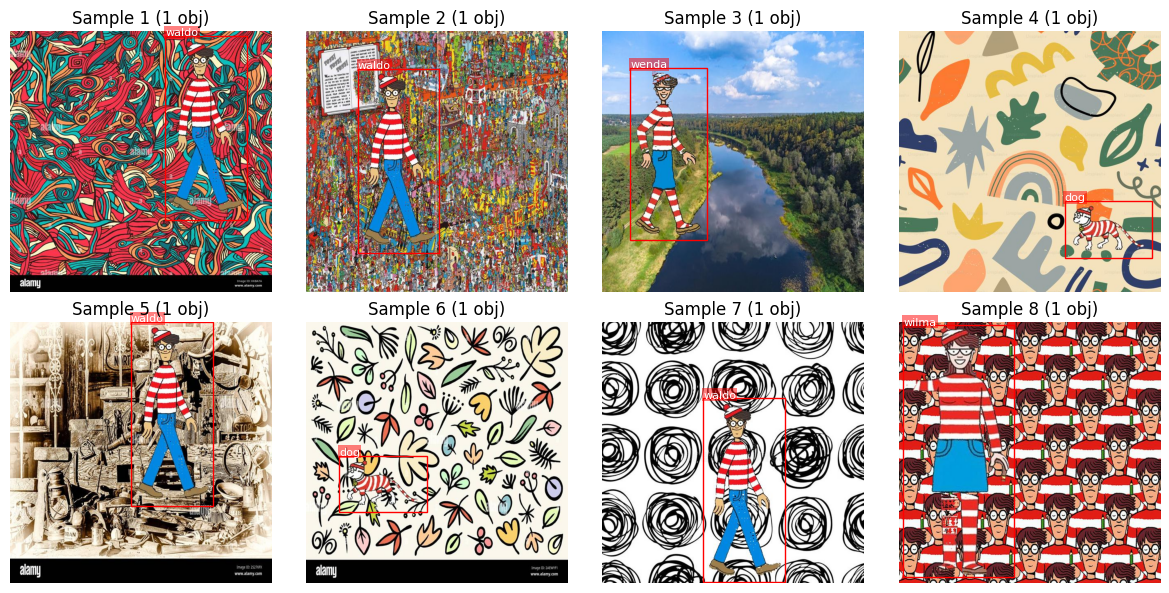

In [11]:
import math
from torchvision.transforms.functional import to_pil_image

CLASS_NAMES = ['waldo', 'wenda', 'dog','wilma']
TARGET_SAMPLES = 8

def visualize_batch(data_loader):
    images, targets = next(iter(data_loader))
    if images.shape[0] < TARGET_SAMPLES:
        num_to_display = images.shape[0]
        print(f"Warning: Batch size is only {images.shape[0]}. Displaying all available samples.")
    else:
        num_to_display = TARGET_SAMPLES
    cols = min(4, num_to_display)
    rows = math.ceil(num_to_display / cols)

    fig, axes = plt.subplots(rows, cols, figsize=(3 * cols, 3 * rows))
    axes=axes.flatten()
    for i in range(num_to_display):
        ax = axes[i]

        image_tensor = images[i]
        image_np = image_tensor.permute(1, 2, 0).cpu().numpy()

        H, W = image_np.shape[0], image_np.shape[1]
        ax.imshow(image_np)
        ax.axis('off')
        img_targets = targets[targets[:, 0] == i]

        for target in img_targets:
            class_id = int(target[1].item())
            yolo_x, yolo_y, yolo_w, yolo_h = target[2:].tolist()
            box_w_px = yolo_w*W
            box_h_px = yolo_h* H

            x_min_px = (yolo_x*W)-(box_w_px/2)
            y_min_px = (yolo_y*H)-(box_h_px/2)

            rect = plt.Rectangle(
                (x_min_px, y_min_px),
                box_w_px,
                box_h_px,
                linewidth=1,
                edgecolor='red',
                facecolor='none'
            )
            ax.add_patch(rect)
            class_name = CLASS_NAMES[class_id]
            ax.text(x_min_px, y_min_px-2, class_name, color='white', fontsize=8, bbox=dict(facecolor='red', alpha=0.5, edgecolor='none', pad=1))

        ax.set_title(f"Sample {i+1} ({len(img_targets)} obj)")

    for j in range(num_to_display, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()
visualize_batch(train_dataloader)

## **5. Creating a Custom Object Detection Model**

In this assignment, you are tasked with building your own custom object detection model.

Design a CNN-based architecture that includes a **backbone for feature extraction** and **two output branches**:

- One for **class probabilities** (with output size equal to the number of object classes, e.g., 3).
- Another for **bounding box regression** (with size 4 for the box coordinates: $[x_{center}, y_{center}, width, height]$).

This is the **core evaluation of the assignment**. Experiment with different layers, hyperparameters, and regularization techniques to optimize the model's performance.

> **Note**: You **ARE** allowed to use a pre-trained backbone (`VGG`, `ResNet`) for this task. You are free to fine-tune the pre-trained backbone or just freeze is completely.

```python
class CustomModel(nn.Module):
    def __init__(self, num_classes=3):
        super(CustomModel, self).__init__()
        raise NotImplementedError

    def forward(self, x):
        raise NotImplementedError
```

In [12]:
from torchvision import models
class CustomModel(nn.Module):
    def __init__(self, num_classes=NUM_CLASSES, freeze_backbone=True):
        super(CustomModel, self).__init__()
        self.backbone = models.resnet34(weights=models.ResNet34_Weights.IMAGENET1K_V1)
        self.feature_size = self.backbone.fc.in_features
        self.backbone.fc = nn.Identity()

        if freeze_backbone:
            for param in self.backbone.parameters():
                param.requires_grad = False

        self.cls_head = nn.Sequential(
            nn.Linear(self.feature_size, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, num_classes)
        )

        self.reg_head = nn.Sequential(
            nn.Linear(self.feature_size, 256),
            nn.ReLU(),
            nn.Linear(256, 128),
            nn.ReLU(),
            nn.Linear(128, 4)
        )
    def forward(self, x):
      features = self.backbone(x)
      cls_output = self.cls_head(features)
      reg_output = self.reg_head(features)

      return cls_output, reg_output

## **6.1 Plotting Model Parameter Count and Size**

A convenient way to inspect the number of parameters in a defined `nn.Module` is by using the `torchsummary` package. This package provides a detailed summary of the model architecture, including the number of parameters in each layer, their shapes, and the total parameter count.

To use `torchsummary`, you need to pass a dummy tensor with the specified input shape. The package will then traverse the model, layer by layer, calculating the total number of trainable and non-trainable parameters while also displaying the output shapes at each stage.

Sumnmarize **both models**!

```python
model = CustomModel().to(device)
summary(model, input_size = )
```

In [13]:
# ADD YOUR CODE HERE
from torchsummary import summary
model = CustomModel().to(device)
summary(model, input_size=(3, 640, 640))

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth


100%|██████████| 83.3M/83.3M [00:01<00:00, 85.9MB/s]


----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 320, 320]           9,408
       BatchNorm2d-2         [-1, 64, 320, 320]             128
              ReLU-3         [-1, 64, 320, 320]               0
         MaxPool2d-4         [-1, 64, 160, 160]               0
            Conv2d-5         [-1, 64, 160, 160]          36,864
       BatchNorm2d-6         [-1, 64, 160, 160]             128
              ReLU-7         [-1, 64, 160, 160]               0
            Conv2d-8         [-1, 64, 160, 160]          36,864
       BatchNorm2d-9         [-1, 64, 160, 160]             128
             ReLU-10         [-1, 64, 160, 160]               0
       BasicBlock-11         [-1, 64, 160, 160]               0
           Conv2d-12         [-1, 64, 160, 160]          36,864
      BatchNorm2d-13         [-1, 64, 160, 160]             128
             ReLU-14         [-1, 64, 1

## **6.2 Defining Loss Function and Optimizer**

**Loss Functions and their options:**

For our custom object detection task, we are performing both **regression** (for bounding box coordinates) and **classification** (for object categories). Our network predicts **continuous** bounding box values, along with a **discrete** class label, meaning that our chosen loss function should effectively be a composite of two losses:  

1. **A regression loss** for bounding box prediction.  
2. **A classification loss** for object label prediction.  

Here are some common loss functions that can be used:  

---

### **a. Mean Squared Error (MSE) Loss** (Bounding Box Regression)  
MSE loss is a standard choice for regression tasks, as it penalizes larger errors more strongly than smaller ones. For bounding box prediction, this ensures that predicted box coordinates are as close as possible to the ground truth.  

$$
\mathcal{L}_{MSE} = \frac{1}{N} \sum_{i=1}^{N} (y_i - \hat{y}_i)^2
$$  

where $ y_i $ is the ground truth bounding box coordinate and $ \hat{y}_i $ is the predicted coordinate.  

- **Pros:** Simple, computationally efficient, commonly used in regression tasks.  
- **Cons:** Sensitive to outliers since it squares errors, which may cause instability when predicting bounding boxes.  

---

### **b. Cross-Entropy Loss (Classification Loss)**  
For predicting object classes, **Cross-Entropy Loss** is the most commonly used loss function in classification tasks. It is defined as:  

$$
\mathcal{L}_{CE} = -\sum_{i=1}^{C} y_i \log(\hat{y}_i)
$$  

where $ C $ is the total number of object classes, $ y_i $ is the ground truth label (one-hot encoded), and $ \hat{y}_i $ is the predicted probability for that class.  

- **Pros:** Standard for classification, provides well-calibrated probabilities.  
- **Cons:** Can be affected by class imbalances; label smoothing or weighted loss may be needed.  

---

### **c. Huber Loss (Smooth Bounding Box Regression Loss)**  
Huber Loss is an improvement over MSE that reduces sensitivity to outliers. It applies MSE for small errors and Mean Absolute Error (MAE) for larger errors:  

$$
\mathcal{L}_{Huber} =
\begin{cases}
\frac{1}{2} (y_i - \hat{y}_i)^2, & \text{if} \ |y_i - \hat{y}_i| \leq \delta \\
\delta (|y_i - \hat{y}_i| - \frac{1}{2} \delta), & \text{otherwise}
\end{cases}
$$  

where $ \delta $ is a threshold that determines when the loss transitions from quadratic to linear.  

- **Pros:** More robust than MSE, reduces the effect of outliers on bounding box predictions.  
- **Cons:** Requires tuning of $ \delta $ for optimal performance.  

---

### **d. Intersection over Union (IoU) Loss (Bounding Box Alignment Loss)**  
IoU Loss directly optimizes the overlap between the predicted and ground-truth bounding boxes:  

$$
\mathcal{L}_{IoU} = 1 - \frac{\text{Intersection Area}}{\text{Union Area}}
$$  

This loss ensures that the model prioritizes bounding box alignment rather than just minimizing coordinate differences.  

- **Pros:** More appropriate for object detection since it directly optimizes box overlap.  
- **Cons:** Harder to optimize, as gradients may vanish when boxes do not overlap.  

---

[PyTorch Documentation](https://pytorch.org/docs/stable/nn.html#loss-functions)

---

**Optimizers and their options:**

There are some pre-built [Optimizers in PyTorch](https://pytorch.org/docs/stable/optim.html), they are sufficient in most cases, especially if their parameters are well set. The two most well-known are Adam (AdamW) and SGD, both of which originate from Gradient Descent, which we implemented earlier.

* **S**tochastic **G**radient **D**escent ([SGD](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html))
* **ADA**ptive **M**oment optimizer ([ADAM](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html))
* [A good general overview](https://www.ruder.io/optimizing-gradient-descent/)

In [14]:
import torch.optim as optim

optimizer = optim.SGD(model.parameters(), lr=0.005, momentum=0.9, weight_decay=0.0005)
cls_criterion = nn.CrossEntropyLoss()
reg_criterion = nn.SmoothL1Loss()

## **7. Training the Custom Object Detection Model**

When implementing the training loop, ensure the following key aspects are included:

- Set an **appropriate number of epochs** for model training, balancing between underfitting and overfitting.
- Maintain running losses throughout each epoch and compute both **training losses** and **validation losses** per epoch.
- Implement an **early stopping mechanism** to halt training if validation loss stops improving, preventing unnecessary overfitting.
- **Save the model at its best-performing epoch** based on validation loss, ensuring the best version is retained for inference.
- Ensure you're optimizing both **classification loss** and **bounding box regression loss**.

In [15]:
import torch.optim.lr_scheduler as lr_scheduler
NUM_EPOCHS = 30
PATIENCE = 7
UNFREEZE_EPOCH = 5
train_losses = []
val_losses = []

def training(model, save_path, train_losses, val_losses, alpha=0.5):
  print(f"Starting training for: {model.__class__.__name__}")
  best_val_loss = float('inf')
  epochs_since_no_improvement = 0
  model.to(device)

  scheduler = lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3)
  for epoch in range(1, NUM_EPOCHS + 1):
      if epoch == UNFREEZE_EPOCH:
            print(f"Unfreezing ResNet layer4 at Epoch {epoch}")
            for param in model.backbone.layer4.parameters():
                param.requires_grad = True
      model.train() #always set back to training mode after eval phase
      running_train_loss = 0.0

      for inputs, targets in train_dataloader:
          inputs = inputs.to(device)
          targets = targets.to(device)

          optimizer.zero_grad()
          target_classes = targets[:, 1].long()
          target_boxes = targets[:, 2:]
          cls_outputs, reg_outputs = model(inputs)
          cls_loss = cls_criterion(cls_outputs, target_classes)
          reg_loss = reg_criterion(reg_outputs, target_boxes)
          loss = cls_loss + alpha * reg_loss
          loss.backward()
          optimizer.step()

          running_train_loss +=loss.item()*inputs.size(0)

      epoch_train_loss = running_train_loss / len(train_dataloader.dataset)
      train_losses.append(epoch_train_loss)

      model.eval()
      running_val_loss = 0.0
      with torch.no_grad():
          for inputs, targets in val_dataloader:
              inputs = inputs.to(device)
              targets = targets.to(device)
              cls_outputs, reg_outputs = model(inputs)
              target_classes = targets[:, 1].long()
              target_boxes = targets[:, 2:]
              cls_loss = cls_criterion(cls_outputs, target_classes)
              reg_loss = reg_criterion(reg_outputs, target_boxes)
              loss = cls_loss + alpha * reg_loss
              running_val_loss += loss.item() * inputs.size(0)

      epoch_val_loss = running_val_loss / len(val_dataloader.dataset)
      val_losses.append(epoch_val_loss)
      scheduler.step(epoch_val_loss)
      print(f"Epoch {epoch}/{NUM_EPOCHS} | Train Loss: {epoch_train_loss:.6f} | Val Loss: {epoch_val_loss:.6f}")

      if epoch_val_loss < best_val_loss:
          print(f"Validation loss improved ({best_val_loss:.6f} -> {epoch_val_loss:.6f}). Saving model...")
          best_val_loss = epoch_val_loss
          epochs_since_no_improvement = 0
          torch.save(model.state_dict(), save_path)
      else:
          epochs_since_no_improvement += 1
          print(f"Validation loss did not improve. Patience counter: {epochs_since_no_improvement}/{PATIENCE}")

      if epochs_since_no_improvement >= PATIENCE:
          print(f"\nEarly stopping triggered after {epoch} epochs (no improvement for {PATIENCE} epochs).")
          break

  model.load_state_dict(torch.load(save_path))
  print(f"Best model weights loaded from {save_path}.")


In [16]:
training(model, 'best_colorization_cnn.pth', train_losses, val_losses)

Starting training for: CustomModel
Epoch 1/30 | Train Loss: 1.427975 | Val Loss: 1.377108
Validation loss improved (inf -> 1.377108). Saving model...
Epoch 2/30 | Train Loss: 1.365391 | Val Loss: 1.343313
Validation loss improved (1.377108 -> 1.343313). Saving model...
Epoch 3/30 | Train Loss: 1.325389 | Val Loss: 1.299135
Validation loss improved (1.343313 -> 1.299135). Saving model...
Epoch 4/30 | Train Loss: 1.275242 | Val Loss: 1.223954
Validation loss improved (1.299135 -> 1.223954). Saving model...
Unfreezing ResNet layer4 at Epoch 5
Epoch 5/30 | Train Loss: 1.133024 | Val Loss: 0.932074
Validation loss improved (1.223954 -> 0.932074). Saving model...
Epoch 6/30 | Train Loss: 0.777455 | Val Loss: 0.640854
Validation loss improved (0.932074 -> 0.640854). Saving model...
Epoch 7/30 | Train Loss: 0.364566 | Val Loss: 0.214891
Validation loss improved (0.640854 -> 0.214891). Saving model...
Epoch 8/30 | Train Loss: 0.110361 | Val Loss: 0.087731
Validation loss improved (0.214891 -> 0

## **8.1 Visualizing Training Metrics**

- **Restore the model's parameters** from the checkpoint where validation loss was lowest to use the most optimal version of the model.
- Use `Matplotlib` or `Seaborn` to plot the loss curves over epochs.

Did your model **converge**? Explain your results!

```python
def plot_losses():
  raise NotImplementedError
```

> **Answer:** The model has converged at around 10th epoch, as can be seen with the training loss decreasing. It also generalizes well to unseen data, as the validation loss stayed consistent, and has decreased too.

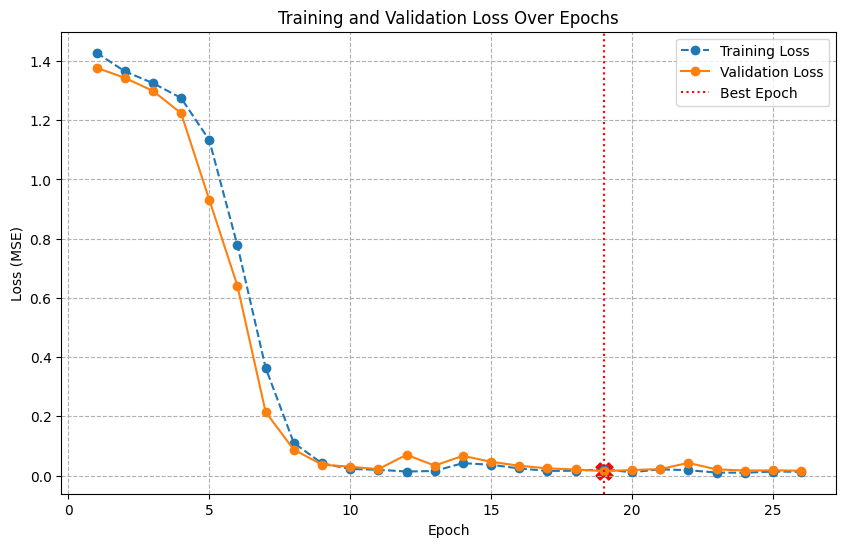

In [17]:

import matplotlib.pyplot as plt

def plot_losses(model, model_save_path, train_losses, val_losses):
    model.load_state_dict(torch.load(model_save_path))
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(10, 6))
    plt.plot(epochs, train_losses, label='Training Loss', marker='o', linestyle='--')
    plt.plot(epochs, val_losses, label='Validation Loss', marker='o', linestyle='-')

    #epoch with the lowest validation loss
    if val_losses:
        best_epoch = np.argmin(val_losses) + 1
        best_loss = np.min(val_losses)
        plt.axvline(x=best_epoch, color='r', linestyle=':', label=f'Best Epoch')
        plt.scatter(best_epoch, best_loss, color='red', marker='X', s=150)

    plt.title('Training and Validation Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss (MSE)')
    plt.legend()
    plt.grid(True, linestyle='--')
    plt.show()
plot_losses(model, 'best_colorization_cnn.pth', train_losses, val_losses)

## **8.2 Running Inference on the Custom Object Detection Model**

After training your **custom object detection model**, evaluate its performance by passing test images through it. Select **at least three** key evaluation metrics to assess the model’s effectiveness. Potential metrics include:

### **Key Object Detection Metrics**
- **Precision**: Measures the proportion of correctly detected objects among all predicted objects.
- **Recall**: Represents the proportion of correctly detected objects out of all actual objects present in the image.
- **F1-Score**: The harmonic mean of Precision and Recall, balancing false positives and false negatives.
- **IoU (Intersection over Union)**: Computes the ratio of overlap between the predicted bounding box and the ground truth bounding box.
- **mAP (mean Average Precision)**: A widely used metric that calculates precision at multiple recall thresholds and averages them across all object classes.

### **Additional Model Performance Metrics**
- **Inference Speed**: Measure the time taken to process a single image.
- **Number of Parameters**: Count the total trainable parameters in your model.
- **Model Size**: Evaluate the storage space required for the trained model.


```python
def test_model()
  raise NotImplementedError

def calculate_iou()
  raise NotImplementedError

def calculate_map()
  raise NotImplementedError
```

In [19]:
import time
from sklearn.metrics import precision_score, recall_score, f1_score

def box_to_corners(box):
        xc, yc, w, h = box[..., 0], box[..., 1], box[..., 2], box[..., 3]
        x_min = xc-w/2
        y_min = yc-h/2
        x_max = xc+w/2
        y_max = yc+h/2
        return x_min, y_min, x_max, y_max

def calculate_iou(box_a, box_b):
  xa_min, ya_min, xa_max, ya_max = box_to_corners(box_a)
  xb_min, yb_min, xb_max, yb_max = box_to_corners(box_b)
  xa_min = xa_min.unsqueeze(-1) if xa_min.dim() < 2 else xa_min
  ya_min = ya_min.unsqueeze(-1) if ya_min.dim() < 2 else ya_min
  xa_max = xa_max.unsqueeze(-1) if xa_max.dim() < 2 else xa_max
  ya_max = ya_max.unsqueeze(-1) if ya_max.dim() < 2 else ya_max

  inter_x_min = torch.max(xa_min, xb_min.T)
  inter_y_min = torch.max(ya_min, yb_min.T)
  inter_x_max = torch.min(xa_max, xb_max.T)
  inter_y_max = torch.min(ya_max, yb_max.T)

  inter_w = torch.clamp(inter_x_max - inter_x_min, min=0)
  inter_h = torch.clamp(inter_y_max - inter_y_min, min=0)
  intersection_area = inter_w * inter_h

  area_a = (xa_max-xa_min)*(ya_max-ya_min)
  area_b = (xb_max-xb_min)*(yb_max-yb_min)

  area_a = area_a.unsqueeze(-1) if area_a.dim() < 2 else area_a
  area_b = area_b.unsqueeze(-1) if area_b.dim() < 2 else area_b

  union_area = area_a + area_b.T - intersection_area
  if union_area != 0:
    iou = intersection_area / union_area
  else:
    iou = intersection_area

  return iou

def calculate_map(predictions, targets, iou_threshold=0.5, num_classes=1):
  total_tp = 0
  total_fp = 0
  total_fn = 0

  for pred_batch, target_batch in zip(predictions, targets):
      gt_boxes = target_batch[:, 2:]
      pred_boxes = pred_batch[:, 2:]
      gt_matched = torch.zeros(gt_boxes.size(0), dtype=torch.bool)

      current_tp = 0
      current_fp = 0

      for p_box_idx, p_box in enumerate(pred_boxes):
          if gt_boxes.size(0) == 0:
              current_fp +=1
              continue

          iou_matrix = calculate_iou(p_box.unsqueeze(0), gt_boxes)

          max_iou, best_gt_idx = iou_matrix.max(dim=1)

          if max_iou.item() >= iou_threshold and not gt_matched[best_gt_idx.item()]:
              current_tp+=1
              gt_matched[best_gt_idx.item()] = True
          else:
              current_fp+=1

      current_fn = (~gt_matched).sum().item()

      total_tp+=current_tp
      total_fp+=current_fp
      total_fn+=current_fn

  return total_tp, total_fp, total_fn




def test_model(model, test_dataloader, device, iou_threshold=0.5):
    model.eval()
    all_predictions = []
    all_targets = []
    inference_times = []

    with torch.no_grad():
        for inputs, targets in test_dataloader:
            inputs = inputs.to(device)

            start_time = time.time()
            cls_outputs, reg_outputs = model(inputs)
            inference_times.append(time.time()-start_time)
            pred_classes = cls_outputs.argmax(dim=1).unsqueeze(1).float()
            pred_confidences = cls_outputs.softmax(dim=1).max(dim=1).values.unsqueeze(1)

            current_preds = torch.cat([pred_classes, pred_confidences, reg_outputs], dim=1)

            all_predictions.append(current_preds.cpu())
            all_targets.append(targets.cpu())

    all_targets = torch.cat(all_targets, dim=0)
    all_predictions = torch.cat(all_predictions, dim=0)

    total_tp, total_fp, total_fn = calculate_map(
        predictions=[all_predictions],
        targets=[all_targets],
        iou_threshold=iou_threshold
    )
    eps =1e-6
    precision = total_tp / (total_tp + total_fp + eps)
    recall = total_tp / (total_tp + total_fn + eps)
    f1_score = 2*(precision * recall) / (precision + recall + eps)
    avg_inference_time = sum(inference_times) / len(inference_times) if inference_times else 0

    print(f"Selected IoU Threshold: {iou_threshold:.2f}")
    print(f"1Precision:{precision:.4f}")
    print(f"Recall:{recall:.4f}")
    print(f"F1-Score:{f1_score:.4f}")
    print(f"AvgInference Speed: {avg_inference_time*1000:.2f}")

    return precision, recall, f1_score, avg_inference_time

## **8.3 Visualizing Model Predictions**
- Select a set of test images and display them with **predicted bounding boxes** overlaid.
- Compare predictions against the **ground truth bounding boxes** to visually assess model accuracy.
- Annotate each prediction with relevant metrics (Precision, Recall, IoU) to highlight how well the model performs.

For detailed tracking and logging, consider using **Weights and Biases (WandB)** or **TensorBoard** to visualize training progress, compare models, and gain deeper insights into your results.

/tmp/ipython-input-2314091508.py:20: UserWarning: The use of `x.T` on tensors of dimension other than 2 to reverse their shape is deprecated and it will throw an error in a future release. Consider `x.mT` to transpose batches of matrices or `x.permute(*torch.arange(x.ndim - 1, -1, -1))` to reverse the dimensions of a tensor. (Triggered internally at /pytorch/aten/src/ATen/native/TensorShape.cpp:4421.)
  inter_x_min = torch.max(xa_min, xb_min.T)


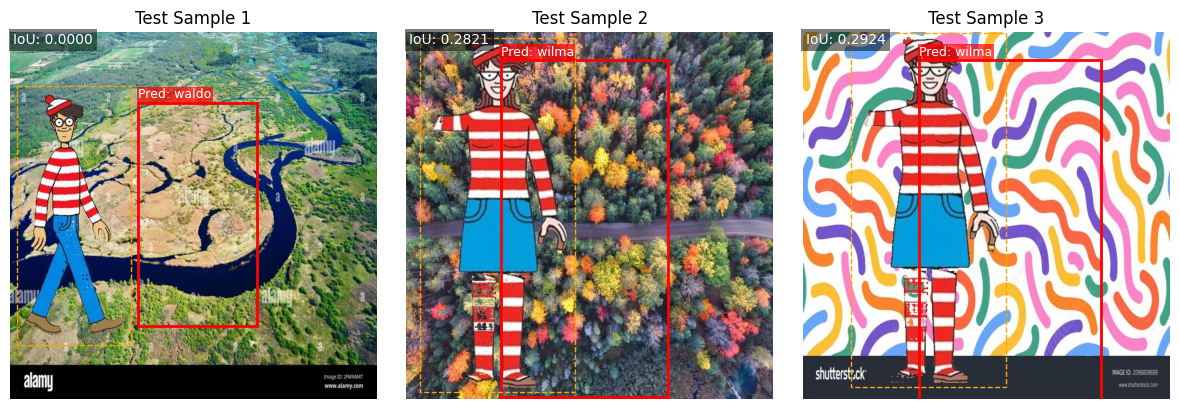

In [20]:
TARGET_VISUALIZATIONS = 4
CLASS_NAMES = ['waldo', 'wenda', 'dog','wilma']
IOU_THRESHOLD = 0.5

def visualize_predictions(model, data_loader, device, num_samples=TARGET_VISUALIZATIONS):
    model.eval()
    cols = min(4, num_samples)
    rows = math.ceil(num_samples / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(4 * cols, 4 * rows))
    axes = axes.flatten()

    samples_processed = 0

    with torch.no_grad():
        for inputs, targets in data_loader:
            if samples_processed >= num_samples:
                break

            inputs = inputs.to(device)
            cls_outputs, reg_outputs = model(inputs)
            image_tensor = inputs[0].cpu()

            image_np = image_tensor.permute(1, 2, 0).numpy()
            H, W = image_np.shape[0], image_np.shape[1]

            ax = axes[samples_processed]
            ax.imshow(image_np)
            ax.axis('off')
            ax.set_title(f"Test Sample {samples_processed + 1}")

            gt_targets = targets[targets[:, 0] == 0]

            pred_class_id = cls_outputs[0].argmax().item()
            pred_box_normalized = reg_outputs[0].cpu()


            pred_w_px = pred_box_normalized[2] * W
            pred_h_px = pred_box_normalized[3] * H
            pred_x_min_px = (pred_box_normalized[0] * W) - (pred_w_px / 2)
            pred_y_min_px = (pred_box_normalized[1] * H) - (pred_h_px / 2)



            best_iou = 0.0

            if gt_targets.size(0) > 0:
                gt_boxes_normalized = gt_targets[:, 2:]

                iou_matrix = calculate_iou(pred_box_normalized.unsqueeze(0), gt_boxes_normalized)
                best_iou = iou_matrix.max().item()


            iou_color = 'green' if best_iou >= IOU_THRESHOLD else 'red'

            pred_rect = plt.Rectangle((pred_x_min_px, pred_y_min_px), pred_w_px, pred_h_px, linewidth=2, edgecolor=iou_color, facecolor='none', linestyle='-')
            ax.add_patch(pred_rect)

            pred_label = f"Pred: {CLASS_NAMES[pred_class_id]}"
            ax.text(pred_x_min_px, pred_y_min_px - 8, pred_label, color='white', fontsize=9, bbox=dict(facecolor=iou_color, alpha=0.7, edgecolor='none', pad=1))


            for gt_target in gt_targets:
                gt_box = gt_target[2:].tolist()
                gt_w_px = gt_box[2] * W
                gt_h_px = gt_box[3] * H
                gt_x_min_px = (gt_box[0] * W) - (gt_w_px / 2)
                gt_y_min_px = (gt_box[1] * H) - (gt_h_px / 2)

                gt_rect = plt.Rectangle((gt_x_min_px, gt_y_min_px),gt_w_px, gt_h_px, linewidth=1, edgecolor='orange',facecolor='none', linestyle='--')
                ax.add_patch(gt_rect)

            ax.text(5, 20, f"IoU: {best_iou:.4f}", color='white', fontsize=10,bbox=dict(facecolor='black', alpha=0.5, edgecolor='none', pad=3))
            samples_processed +=1
    for j in range(samples_processed, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

visualize_predictions(model, test_dataloader, device, num_samples=4)

## **9. Loading an Existing Object Detection Model (YOLOvX)**

You are free to select any YOLO model version available. We recommend referring to the **Ultralytics documentation** on object detection: [Ultralytics YOLO Docs](https://docs.ultralytics.com/tasks/detect/).

Training a YOLO model is straightforward and requires a properly formatted **`data.yaml`** file, which defines dataset paths and classes. Refer to the **official GitHub repository** for detailed instructions: [Ultralytics GitHub](https://github.com/ultralytics/ultralytics).

Once your dataset is prepared, you can initiate training directly from the command line using a simple command:

```bash
!yolo detect train data=datasets/data.yaml model=yolov11n.pt epochs=100 imgsz=640
```

A `data.yaml` might look something like this:
```python
with open('dataset/data.yaml', 'w') as f:
        f.write("path:  \ntrain: content/dataset/train/images \nval: content/dataset/val/images \ntest: content/dataset/test/images \n")
        f.write("nc: 3 \n")
        f.write("names:\n  0: wilma\n  1: waldo\n  2: wenda\n")
        f.write('\n')
f.close()
```

In [20]:
!pip install ultralytics
from ultralytics import YOLO

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 21.0 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [24]:
DATASET_ROOT = './dataset/background'

data_yaml_content = f"""
path: {DATASET_ROOT}
train: train/images
val: val/images
test: test/images
nc: 4
names:
  0: waldo
  1: wenda
  2: dog
  3: wilma
"""

with open(f'{DATASET_ROOT}/data.yaml', 'w') as f:
    f.write(data_yaml_content)
print(data_yaml_content)


path: ./dataset/background
train: train/images
val: val/images
test: test/images
nc: 4
names:
  0: waldo
  1: wilma
  2: wenda
  3: dog



In [25]:
!yolo detect train data={DATASET_ROOT}/data.yaml model=yolov8n.pt epochs=50 imgsz=640
results = modelyolo.train(
    data=f'{DATASET_ROOT}/data.yaml',
    epochs=50,
    imgsz=640,
    batch=16,
    name='yolov8_custom_run'
)

Ultralytics 8.3.223 🚀 Python-3.12.12 torch-2.8.0+cu126 CPU (Intel Xeon CPU @ 2.20GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=./dataset/background/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=50, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train2, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, p

KeyboardInterrupt: 

## **10. Evaluating the YOLO Model**

Ensure that you **log and visualize training losses** and **evaluation metrics** throughout the training process. YOLO models typically provide verbose output by default, but you should also generate visualizations to track performance trends effectively.

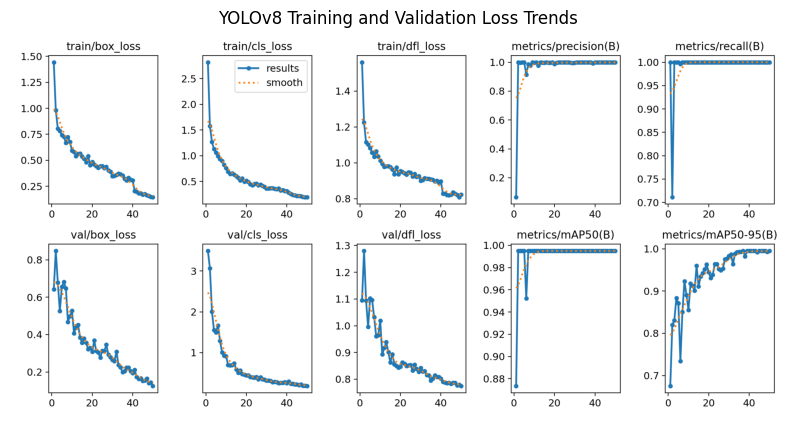

In [27]:
RESULTS_DIR = 'runs/detect/train2'
RESULTS_PLOT_PATH = os.path.join(RESULTS_DIR, 'results.png')

img = Image.open(RESULTS_PLOT_PATH)
plt.figure(figsize=(10, 8))
plt.imshow(img)
plt.axis('off')
plt.title("YOLOv8 Training and Validation Loss Trends")
plt.show()

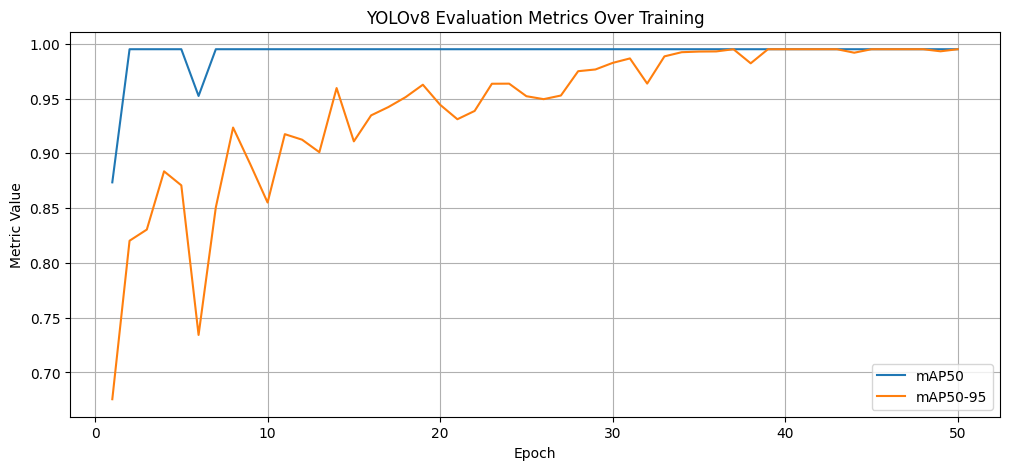

In [28]:

import glob
import pandas as pd
results_files = glob.glob(os.path.join(RESULTS_DIR, 'results.csv'))

df = pd.read_csv(results_files[0])
df.columns = df.columns.str.strip()
plt.figure(figsize=(12, 5))
plt.plot(df['epoch'], df['metrics/mAP50(B)'], label='mAP50')
plt.plot(df['epoch'], df['metrics/mAP50-95(B)'], label='mAP50-95')

plt.xlabel('Epoch')
plt.ylabel('Metric Value')
plt.title('YOLOv8 Evaluation Metrics Over Training')
plt.legend()
plt.grid(True)
plt.show()


Please make sure to download your `.ipynb` file, and upload it to **Canvas** on time!

<img src="https://www.usatoday.com/gcdn/authoring/authoring-images/2023/08/25/USAT/70680172007-alertsm.png?crop=2099,1187,x0,y156" alt="1" border="0">



In [29]:
from datetime import datetime, timedelta, timezone

deadline = datetime(2025, 11, 4, 23, 59, 0, tzinfo=timezone.utc)

def time_until_deadline():
    now = datetime.now(timezone.utc)
    remaining = deadline - now
    if remaining.total_seconds() <= 0:
        return "Time's up!"
    days = remaining.days
    hours, remainder = divmod(remaining.seconds, 3600)
    minutes, _ = divmod(remainder, 60)

    return f"{days} days, {hours} hours, {minutes} minutes"

print("Time left until submission:", time_until_deadline())

Time left until submission: 3 days, 8 hours, 16 minutes
